In [1]:
from keras import layers, models
class AE(models.Model):
    # x_nodes: 입력노드 수, z_dim: 은닉노드 수
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape = (x_nodes, )
        # 입력계층
        x = layers.Input(shape=x_shape)
        # 은닉계층
        z = layers.Dense(z_dim, activation='relu')(x)
        # 출력계층
        y = layers.Dense(x_nodes, activation='sigmoid')(z)
        super().__init__(x, y)
        self.x = x
        self.z = z
        self.z_dim = z_dim

        self.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
    # 신경망 외부에서 부호화 결과를 확인하고 싶을 때 호출할 함수
    def Encoder(self):
        return models.Model(self.x, self.z)
        
    # 복호화 수행 함수
    def Decoder(self):
        z_shape = (self.z_dim, )
        z = layers.Input(shape=z_shape)
        # 출력계층
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)

In [2]:
#데이터 로드
from keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
#정규화
import numpy as np
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print(X_train.shape)

(60000, 28, 28)


In [4]:
#3차원에서 2차원 형태로 모양을 바꿈(차원 축소)
X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
#파라미터 설정(입력노드수: 784, 부호화 벡터길이: 36)
x_nodes = 784
z_dim = 36

In [6]:
#모델 생성
autoencoder = AE(x_nodes, z_dim)

In [7]:
#모델 학습(입력데이터와 출력데이터를 동일하게 설정)
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 0.2917 - accuracy: 0.0125 - val_loss: 0.2023 - val_accuracy: 0.0153
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 0.1807 - accuracy: 0.0112 - val_loss: 0.1631 - val_accuracy: 0.0103
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1524 - accuracy: 0.0099 - val_loss: 0.1423 - val_accuracy: 0.0098
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1355 - accuracy: 0.0104 - val_loss: 0.1286 - val_accuracy: 0.0112
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1237 - accuracy: 0.0113 - val_loss: 0.1188 - val_accuracy: 0.0113
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1149 - accuracy: 0.0105 - val_loss: 0.1114 - val_accuracy: 0.0117
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1084 - accuracy: 0.0111 - val_loss: 0.1061 - val_accuracy: 0.0122
Epoch 

In [8]:
import matplotlib.pyplot as plt
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

In [9]:
def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    if title is not None:
        plt.title(title)
    plt.ylabel("손실")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

In [10]:
def plot_loss_acc(history):
    plot_loss(history,"손실 추이")
    plt.show()
    plot_acc(history,"정확도 추이")
    plt.show()

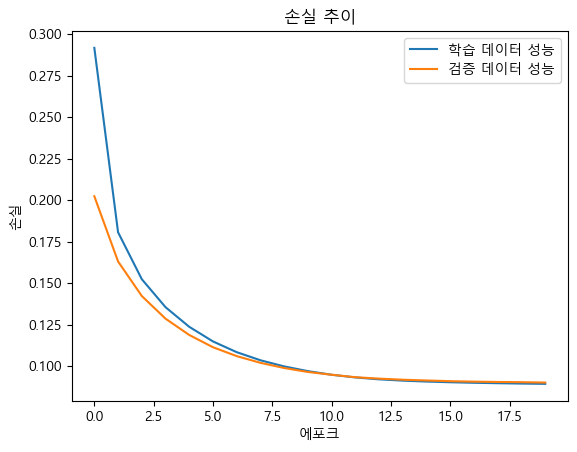

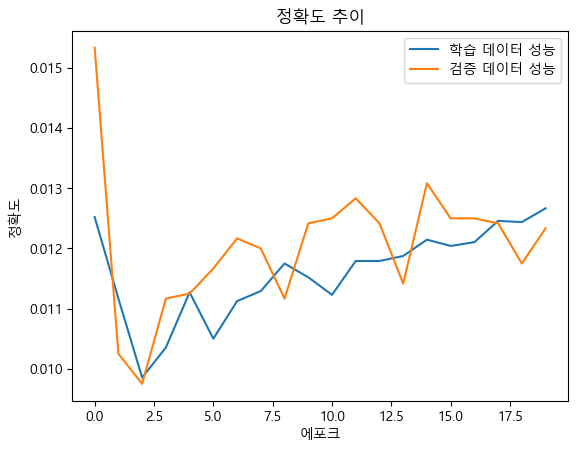

In [11]:
from matplotlib import font_manager, rc
font_location = 'c:/windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
plot_loss_acc(history)

In [12]:
def show_ae(autoencoder):
    # 부호화,복호화 모델의 인스턴스 생성
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()
    encoder.summary()
    decoder.summary()
    # 평가용 이미지들을 넣어서 부호화 결과와 복호화 결과 생성
    encoded_imgs = encoder.predict(X_test)
    # 부호화된 이미지를 넣어서 복호화 데이터를 생성
    decoded_imgs = decoder.predict(encoded_imgs)
    # 화면에 표시할 이미지의 수
    n = 10
    plt.figure(figsize=(20,6))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        # 입력 이미지(평가용 이미지)
        plt.imshow(X_test[i].reshape(28, 28))
        # 흑백으로 출력
        plt.gray()
        # 이미지 주변 축들이 보이지 않게 함
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(3, n, i + 1 + n)
        # 이미지가 압축된 형태(2차원 이미지를 1차원의 벡터로 압축)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(3, n, i + 1 + n + n)
        # 복호화한 이미지 출력
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 36)                28260     
                                                                 
Total params: 28,260
Trainable params: 28,260
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 36)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               29008     
                                                                 
Total params: 29,008
Trainable params: 2

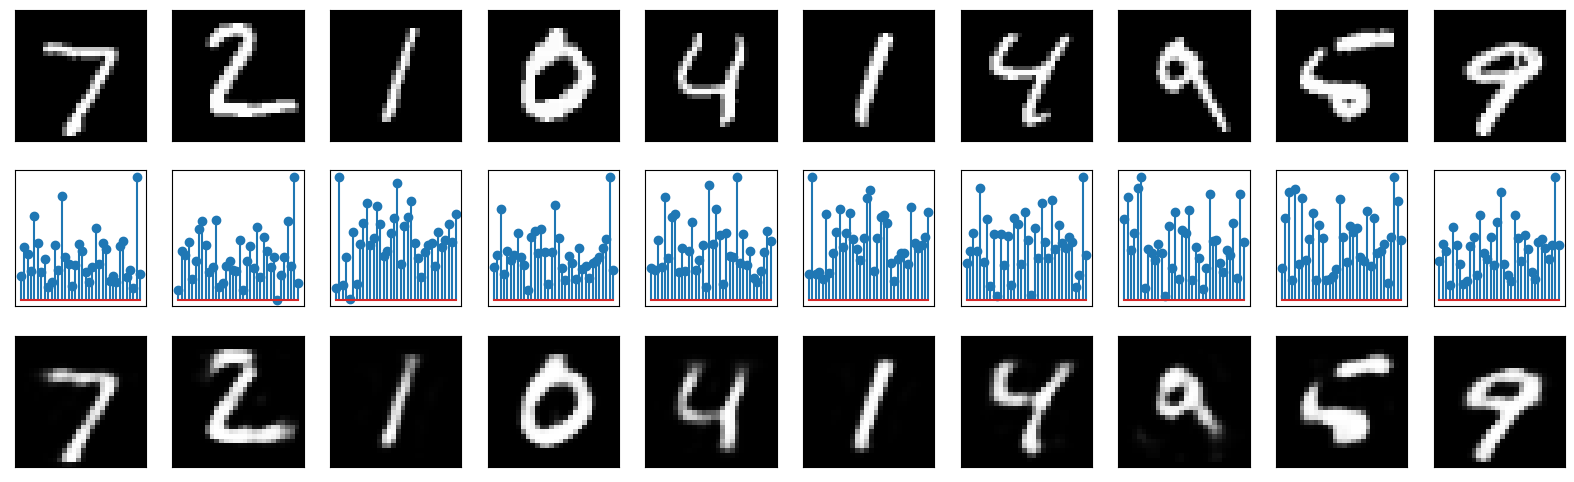

In [13]:
show_ae(autoencoder)